In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customers=pd.read_csv('/content/drive/MyDrive/Data Science Project/Customers.csv')
products=s=pd.read_csv('/content/drive/MyDrive/Data Science Project/Products.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Data Science Project/Transactions.csv')

print("Missing Values:")
print("Customers:",customers.isnull().sum())
print("Products:",products.isnull().sum())
print("Transactions:",transactions.isnull().sum())
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
transactions['TranscationDate']=pd.to_datetime(transactions['TransactionDate'])

transactions=transactions.merge(customers,on="CustomerID",how="left")
transactions=transactions.merge(products,on="ProductID",how="left")
transactions.head()

Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,TranscationDate,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08-25 12:38:23,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05-27 22:23:54,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04-25 07:38:55,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03-26 22:55:37,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03-21 15:10:10,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Region wise Revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


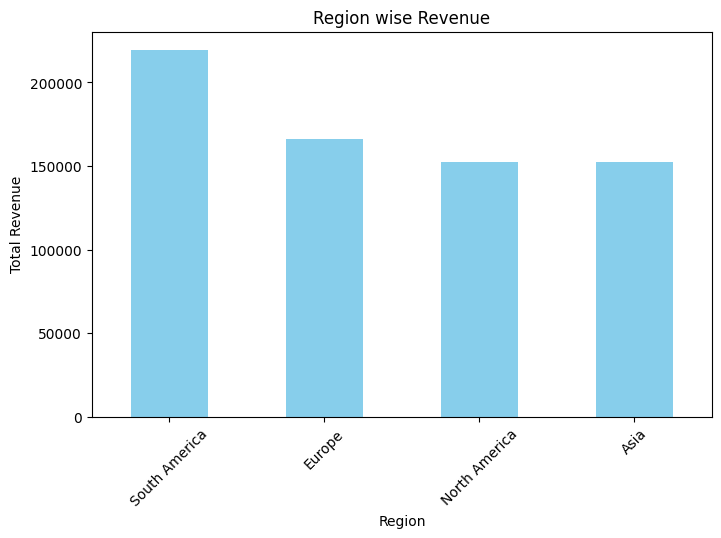

In [ ]:
region_revenue=transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Region wise Revenue:")
print(region_revenue)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
region_revenue.plot(kind='bar',color='skyblue')
plt.title('Region wise Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Popular Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


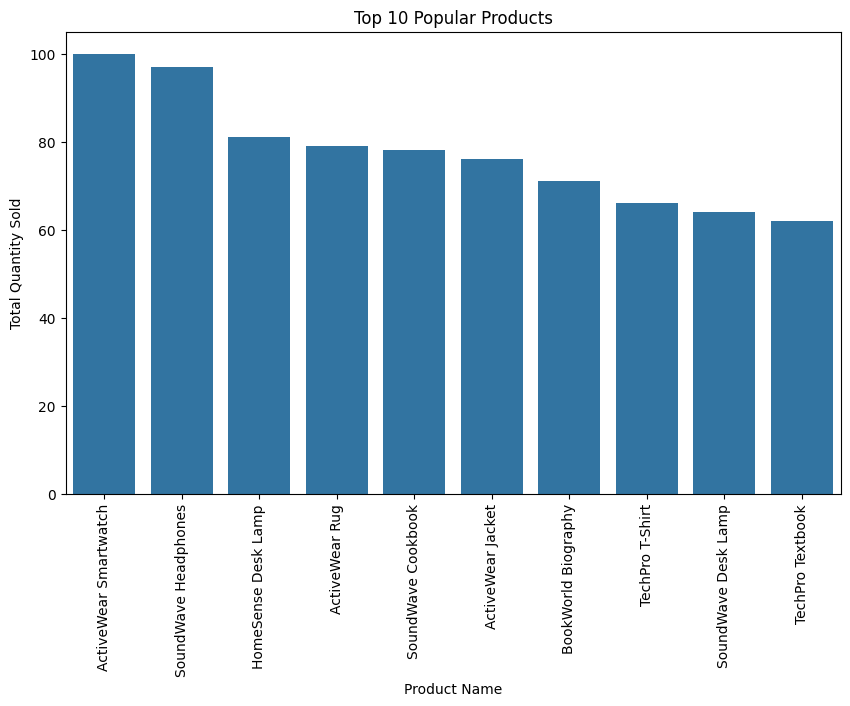

In [ ]:
popular_products=transactions.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Popular Products:")
print(popular_products)

import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Popular Products')
plt.xticks(rotation=90)
plt.show()

Signup Trends by Year:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


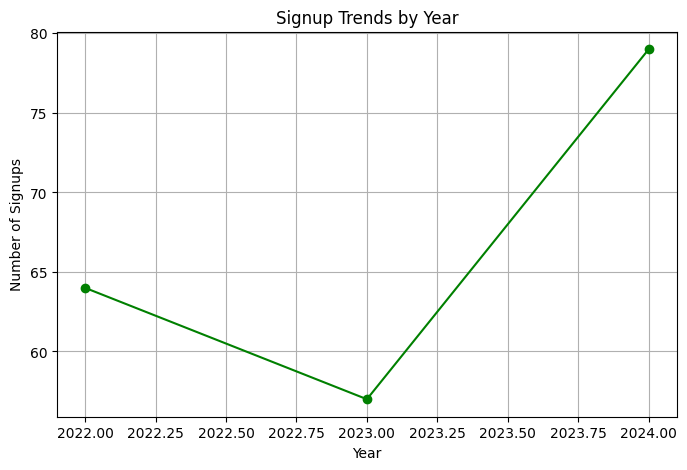

In [ ]:
signup_trends=customers['SignupDate'].dt.year.value_counts().sort_index()
print("Signup Trends by Year:")
print(signup_trends)

plt.figure(figsize=(8,5))
signup_trends.plot(kind='line',marker='o',color='green')
plt.title('Signup Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()

Top Customers by Total Value:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


<ipython-input-16-62f288a35cf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')


Text(0.5, 1.0, 'Top 10 Customers by Total Value')

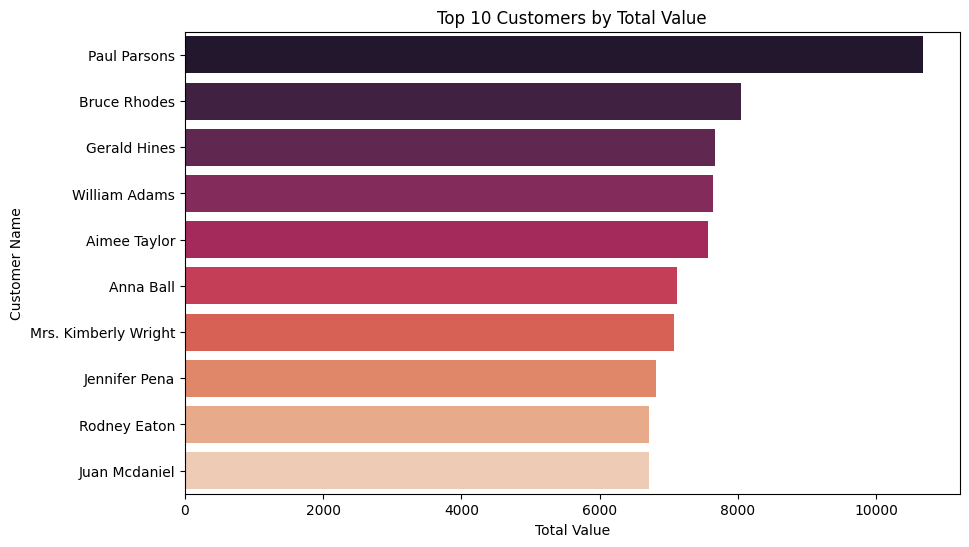

In [ ]:
top_customers=transactions.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top Customers by Total Value:")
print(top_customers)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='rocket')
plt.title('Top 10 Customers by Total Value')
plt.xlabel('Total Value')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Value')

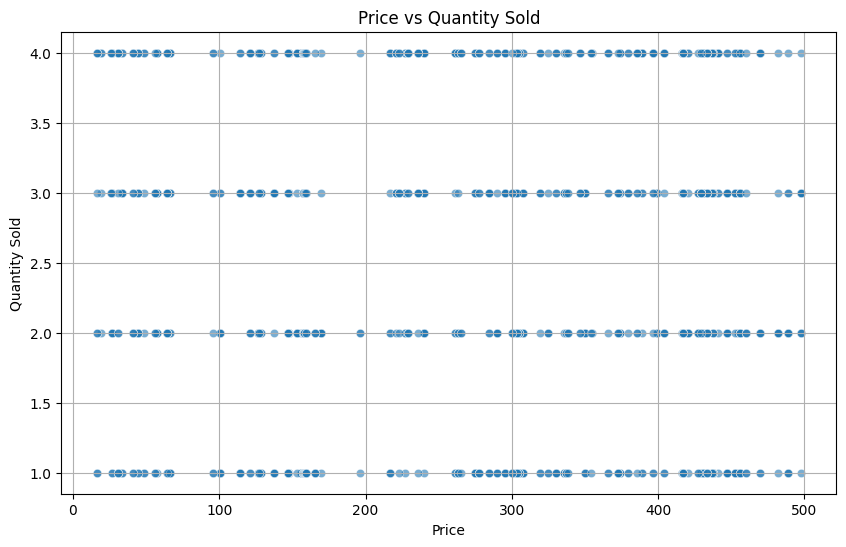

In [ ]:
# print(transactions.columns)
plt.figure(figsize=(10,6))
sns.scatterplot(data=transactions,x='Price_x',y='Quantity',alpha=0.6)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

In [21]:
transactions.to_csv("Processed_Transactions.csv", index=False)
print("\nProcessed data saved as 'Processed_Transactions.csv'.")


Processed data saved as 'Processed_Transactions.csv'.
